In [50]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

from sklearn.datasets import load_iris
from sklearn import tree

In [51]:
# Генерируем уникальный seed
my_code = "Chervinskii"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [52]:
# Читаем данные из файла
example_data = pd.read_csv("datasets/Fish.csv")

In [53]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [54]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [55]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [56]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [57]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [58]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [59]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.686343,0.649485,0.651163,0.648551,0.642641,0.820478,Perch
1,0.595383,0.56701,0.583333,0.637681,0.949328,0.739231,Bream
2,0.510696,0.6,0.593023,0.588768,0.621229,0.88856,Perch
3,0.137444,0.298969,0.302326,0.302536,0.322986,0.377114,Perch
4,0.429145,0.558763,0.554264,0.552536,0.513292,0.749746,Perch
...,...,...,...,...,...,...,...
90,0.153127,0.369072,0.370155,0.36413,0.322394,0.495969,Perch
91,0.087259,0.268041,0.263566,0.280797,0.28473,0.352419,Roach
92,0.039583,0.185567,0.189922,0.208333,0.207208,0.25007,Roach
93,0.090396,0.268041,0.273256,0.275362,0.293907,0.36316,Perch


In [60]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [61]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Width', 'Length1', 'Height']
Length3


In [62]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [63]:
x_train

,Width,Length1,Height
0,0.820478,0.649485,0.642641
1,0.739231,0.56701,0.949328
2,0.88856,0.6,0.621229
3,0.377114,0.298969,0.322986
4,0.749746,0.558763,0.513292
...,...,...,...
90,0.495969,0.369072,0.322394
91,0.352419,0.268041,0.28473
92,0.25007,0.185567,0.207208
93,0.36316,0.268041,0.293907


In [64]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
r_model1 = DecisionTreeRegressor(criterion='mse')
r_model2 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model3 = DecisionTreeRegressor(criterion='mae', splitter='random', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model4 = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [65]:
r_models = []
r_models.append(r_model1)
r_models.append(r_model2)
r_models.append(r_model3)
r_models.append(r_model4)

In [66]:
# Обучаем модели
for model in r_models:
    model.fit(x_train, y_train)

In [67]:
# Оценииваем качество работы моделей на валидационной выборке
mses = []
for model in r_models:
    val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, val_pred)
    mses.append(mse)
    print(mse)

0.0006256071466078548
0.029674693056639223
0.030034886315900025
0.0005758662505250995


In [68]:
# Выбираем лучшую модель
i_min = mses.index(min(mses))
best_r_model = r_models[i_min]
best_r_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'poisson',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [69]:
# Вычислим ошибку лучшей модели на тестовой выборке.
test_pred = best_r_model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print(mse)

0.0008019052916929224


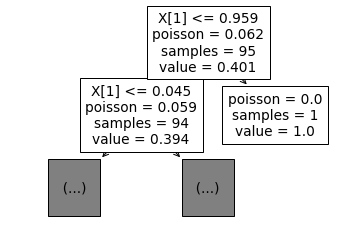

In [70]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_r_model, max_depth=1)
plt.show()

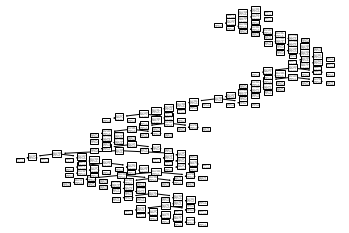

In [71]:
plot_tree(best_r_model)
plt.show()

In [72]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [73]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Length2', 'Width']
Species


In [74]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [75]:
x_train

,Length2,Width
0,0.651163,0.820478
1,0.583333,0.739231
2,0.593023,0.88856
3,0.302326,0.377114
4,0.554264,0.749746
...,...,...
90,0.370155,0.495969
91,0.263566,0.352419
92,0.189922,0.25007
93,0.273256,0.36316


In [82]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
d_model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [83]:
d_models = []
d_models.append(d_model1)
d_models.append(d_model2)
d_models.append(d_model3)
d_models.append(d_model4)

In [84]:
# Обучаем модели
for model in d_models:
    model.fit(x_train, y_train)

In [85]:
# Оценииваем качество работы моделей на валидационной выборке.
f1s = []
for model in d_models:
    val_pred = model.predict(x_val)
    f1 = f1_score(y_val, val_pred, average='weighted')
    f1s.append(f1)
    print(f1)

0.5592329545454545
0.6024584076054664
0.676183712121212
0.5738043024227233


In [86]:
# Выбираем лучшую модель
i_min = f1s.index(min(f1s))
best_d_model = d_models[i_min]
best_d_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [87]:
# Вычислим ошибку лучшей модели на тестовой выборке.
test_pred = best_d_model.predict(x_test)
f1 = f1_score(y_test, test_pred, average='weighted')
print(f1)

0.6374797077922078


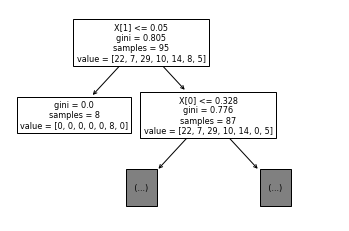

In [89]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_d_model, max_depth=1)
plt.show()

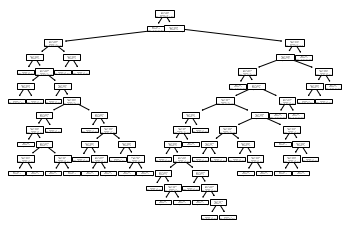

In [90]:
plot_tree(best_d_model)
plt.show()